In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from lib import *
import scipy

In [2]:
img_file = "../data/train-images-idx3-ubyte"
x_train = parsing_file(img_file)

In [3]:
xs_train, mnist_mean = pre_process(x_train)

In [4]:
mnist_mean

0.1306604762738429

# Loading optimization variables

In [23]:
lambda_ = np.load("../NCE_results/precision_matrix_mask.npy")

In [24]:
lambda_

array([[ 4.98120074e+03, -1.18575851e-02,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.18575851e-02,  4.96275083e+03, -1.18598853e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.18598853e-02,  4.97817549e+03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.01780805e+03, -1.18612815e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.18612815e-02,  5.00349899e+03, -1.18757328e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.18757328e-02,  5.00977809e+03]])

In [25]:
L = np.linalg.cholesky(lambda_)

In [26]:
res = mnist_mean + scipy.linalg.solve_triangular(L, np.random.normal(size=28**2), lower=True)
res = res.reshape(28, 28)

# Results

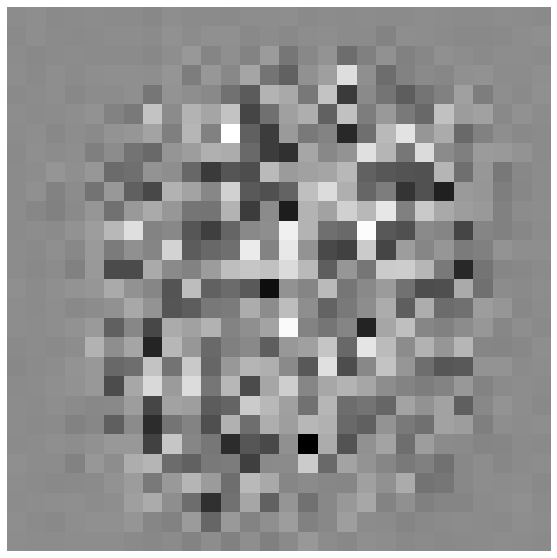

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(res, cmap="gray");
plt.axis("off");